## Import and load libs

In [259]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
data_folder=Path("C:/Users/msi/Desktop/clustering/")
file_to_open= data_folder/ "FaceBook-dataset.csv"

In [260]:
%%time
df = pd.read_csv(file_to_open)

Wall time: 29.9 ms


### let's play with and prepare the data

In [261]:
df.shape

(7050, 16)

In [262]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
Column1             0 non-null float64
Column2             0 non-null float64
Column3             0 non-null float64
Column4             0 non-null float64
dtypes: float64(4), int64(9), object(3)
memory usage: 881.4+ KB


In [264]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [265]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [266]:
%%time
missing_data(df)

Wall time: 11 ms


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
Total,0,0,0,0,0,0,0,0,0,0,0,0,7050,7050,7050,7050
Percent,0,0,0,0,0,0,0,0,0,0,0,0,100,100,100,100
Types,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64


In [267]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [268]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


# EDA

In [269]:
# let's check status id properties
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [270]:
# It's clearly observable that each row has a unique ID; After all the name of that columns is ID and it makes sense
# view how many different types there are
len(df['status_id'].unique())

6997

In [271]:
# let's check status type properties
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [272]:
len(df['status_type'].unique())

4

In [273]:
# let's check status published properties
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [274]:
len(df['status_published'].unique())

6913

In [275]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [276]:
## so it's time to devide the dataset into features and on col as target
X = df
y = df['status_type']
## we should transform data into all integer numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [277]:
## it's time to normalize the data
columns = X.columns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ms = MinMaxScaler()
X = ms.fit_transform(X)
# X=scaler.fit_transform(X)
X = pd.DataFrame(X,columns= [columns])

In [278]:
## let's see our dataset rn
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### Using elbow method

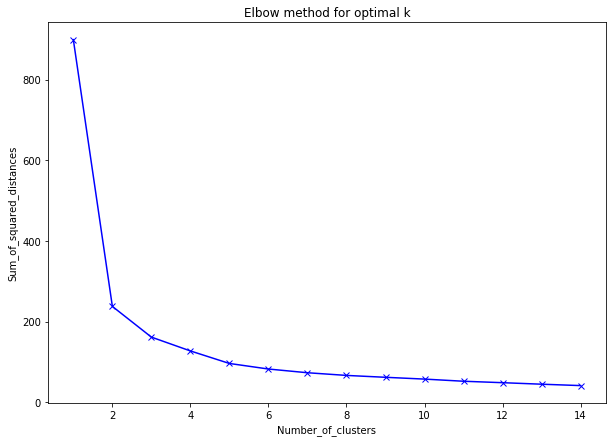

In [279]:
## using elbow-method to find the best value for our clusters
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1,15)
for i in K:
    k_means = KMeans(n_clusters=i,init = 'k-means++')
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)
plt.rcParams['figure.figsize'] = [10,7]
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number_of_clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

# Clustering

## K-means

In [280]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Number of correct lables are %d out of %d." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Number of correct lables are 4351 out of 7050.
Accuracy score: 0.62


In [281]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("calinski_harabasz_score:%0.3f"
      % metrics.calinski_harabasz_score(X, labels))

Homogeneity: 0.774
Completeness: 0.730
V-measure: 0.751
Adjusted Rand Index: 0.826
Adjusted Mutual Information: 0.751
Silhouette Coefficient: 0.777
calinski_harabasz_score:14238.099


### PCA

In [282]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

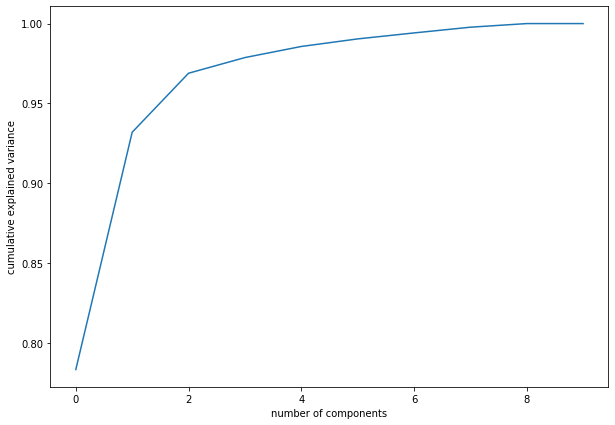

In [283]:
## Creating the Scree-plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [284]:
loadings = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':X})
loadings

,PC1,PC2,Feature
0,0.993016,-0.065024,"(status_type,)"
1,0.040480,0.707033,"(num_reactions,)"
2,0.045371,0.041957,"(num_comments,)"
3,0.050365,0.064928,"(num_shares,)"
4,0.028035,0.684384,"(num_likes,)"
5,0.079719,0.126094,"(num_loves,)"
6,0.010980,0.062577,"(num_wows,)"
7,0.015373,0.031253,"(num_hahas,)"
8,0.008780,0.017140,"(num_sads,)"
9,0.010523,0.020780,"(num_angrys,)"


### Feature Importance

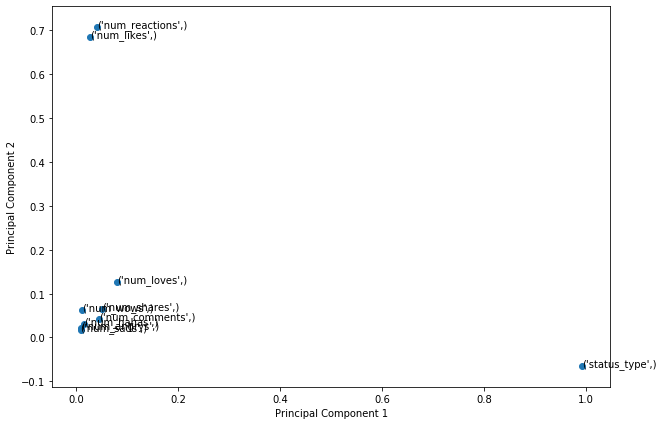

In [285]:
# visualize feature importance 
plt.scatter(loadings.PC1, loadings.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(loadings.Feature):
    plt.annotate(txt, (loadings.PC1[i],loadings.PC2[i]))
# plt.tight_layout()
plt.show()

In [286]:
samples=X.values

### Using PCA to choose only fundemental attributes

In [287]:
pca2=PCA(n_components=2)
samples=pd.DataFrame(pca2.fit_transform(samples))

In [288]:
samples

,0,1
0,0.446218,0.068944
1,-0.237240,-0.010435
2,0.429787,-0.028372
3,-0.237808,-0.021956
4,-0.235285,0.008596
...,...,...
7045,-0.238128,-0.028455
7046,-0.238982,-0.049920
7047,-0.239278,-0.054110
7048,-0.233736,0.049479


In [308]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(samples)
labels2 = kmeans2.labels_
correct_labels2 = sum(y == labels2)
print("Number of correct lables are %d out of %d." % (correct_labels2, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels2/float(y.size)))

Number of correct lables are 4437 out of 7050.
Accuracy score: 0.63


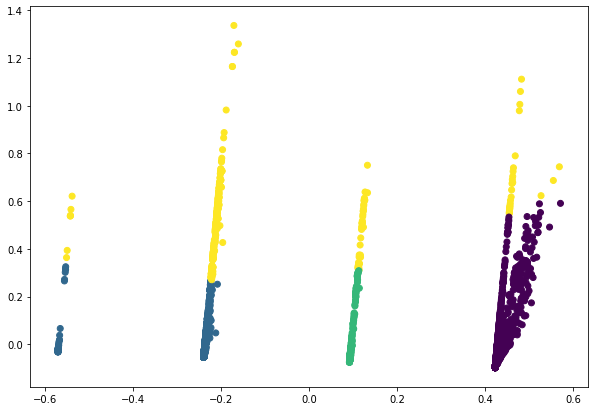

In [309]:
plt.scatter(samples[0],samples[1],c=labels2, cmap='viridis')

In [310]:
clusters_x=[item[0] for item in kmeans2.cluster_centers_]
clusters_y=[item[1] for item in kmeans2.cluster_centers_]

### Plot k-means with centers

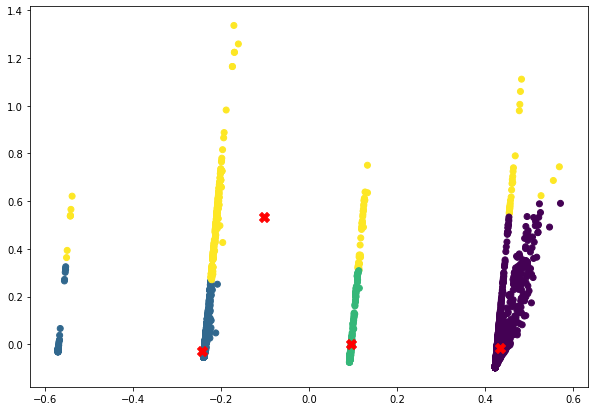

In [311]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(samples[0],samples[1],c=labels2, cmap='viridis')
ax1.scatter(clusters_x,clusters_y,marker='X', s=100, color='red')
plt.show()

# DBSCAN

## Find proper value for Epsilon

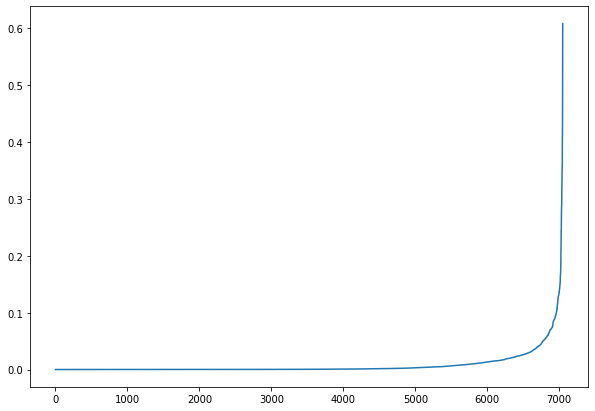

In [293]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=19)
mymodel = nn.fit(X)
distances, indices = mymodel.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [294]:
# Compute DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps=0.1, min_samples=20).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("calinski_harabasz_score:%0.3f"
      % metrics.calinski_harabasz_score(X, labels))

Estimated number of clusters: 4
Estimated number of noise points: 225
Homogeneity: 0.969
Completeness: 0.869
V-measure: 0.917
Adjusted Rand Index: 0.957
Adjusted Mutual Information: 0.917
Silhouette Coefficient: 0.711
calinski_harabasz_score:6721.303


## DBSCAN with PCA

In [295]:
db2 = DBSCAN(eps=0.3, min_samples=10).fit(samples)
core_samples_mask = np.zeros_like(db2.labels_, dtype=bool)
core_samples_mask[db2.core_sample_indices_] = True
labels = db2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("calinski_harabasz_score:%0.3f"
      % metrics.calinski_harabasz_score(X, labels))

Estimated number of clusters: 4
Estimated number of noise points: 1
Homogeneity: 1.000
Completeness: 0.998
V-measure: 0.999
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 0.999
Silhouette Coefficient: 0.703
calinski_harabasz_score:6514.778


### Finding cluster centers

In [296]:
cluster_dic={}
for i,item in enumerate(samples.values):
    if db2.labels_[i] not in cluster_dic.keys():
        cluster_dic[db2.labels_[i]]=[item]
    else:
        cluster_dic[db2.labels_[i]].append(item)

In [297]:
cluster_centers=[]
for key,value in cluster_dic.items():
    if key!=-1:
         cluster_centers.append(np.mean(value,axis=0))

In [298]:
cluster_centers

[array([ 0.43429727, -0.00873724]),
 array([-0.23648216, -0.00123973]),
 array([-0.56492216,  0.07639968]),
 array([0.0983838 , 0.05358217])]

### plot DBSCAN with centers

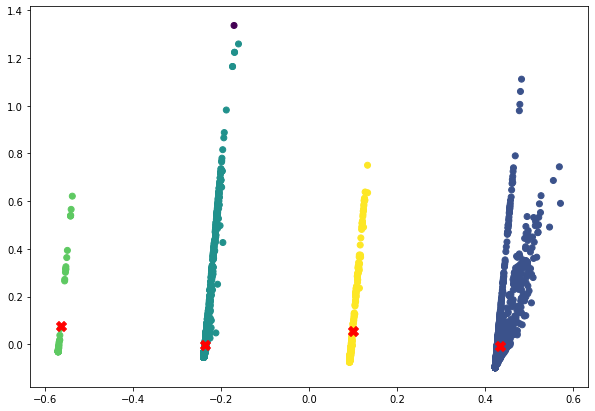

In [299]:
clusters_x=[item[0] for item in cluster_centers]
clusters_y=[item[1] for item in cluster_centers]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(samples[0],samples[1],c=labels, cmap='viridis')
ax1.scatter(clusters_x,clusters_y,marker='X', s=100, color='red')
plt.show()
# plt.scatter(samples[0],samples[1],c=labels, cmap='viridis')

## AgglomerativeClustering

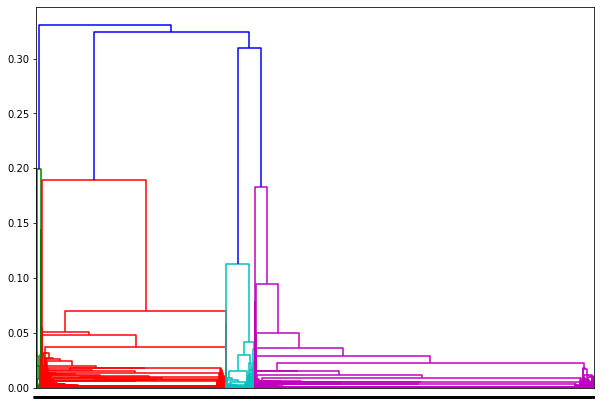

In [300]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(samples, 'single')

labelList = y

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [301]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglo.fit(X)
labels = agglo.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("calinski_harabasz_score:%0.3f"
      % metrics.calinski_harabasz_score(X, labels))

Homogeneity: 0.749
Completeness: 0.766
V-measure: 0.757
Adjusted Rand Index: 0.837
Adjusted Mutual Information: 0.757
Silhouette Coefficient: 0.778
calinski_harabasz_score:15790.476


### AgglomerativeClustering with PCA

In [302]:
agglo2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglo2.fit(samples)
labels = agglo2.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Homogeneity: 0.732
Completeness: 0.749
V-measure: 0.740
Adjusted Rand Index: 0.844
Adjusted Mutual Information: 0.740
Silhouette Coefficient: 0.777


### Finding cluster centers

In [303]:
cluster_dic={}
for i,item in enumerate(samples.values):
    if agglo2.labels_[i] not in cluster_dic.keys():
        cluster_dic[agglo2.labels_[i]]=[item]
    else:
        cluster_dic[agglo2.labels_[i]].append(item)
cluster_centers=[]
for key,value in cluster_dic.items():
    if key!=-1:
         cluster_centers.append(np.mean(value,axis=0))

In [304]:
cluster_centers

[array([ 0.39164199, -0.04379142]),
 array([-0.24239085, -0.01978028]),
 array([0.1811193 , 0.44570517])]

### plot AgglomerativeClustering with centers

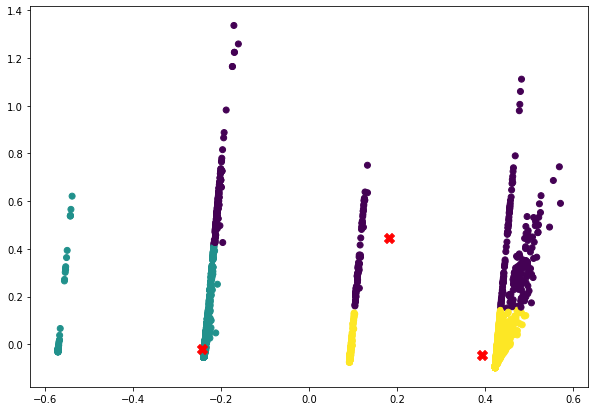

In [305]:
clusters_x=[item[0] for item in cluster_centers]
clusters_y=[item[1] for item in cluster_centers]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(samples[0],samples[1],c=labels, cmap='viridis')
ax1.scatter(clusters_x,clusters_y,marker='X', s=100, color='red')
plt.show()
# plt.scatter(samples[0],samples[1],c=labels, cmap='viridis')